## EDA

In [1]:
import sqlite3
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random
import statsmodels.api as sm

import sys
sys.path.append('resources')

sns.set(style="whitegrid")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 200)

In [2]:
connection = sqlite3.connect('airbnb.db')

In [3]:
vwListings = pd.read_sql_query("SELECT * FROM airbnb_view", connection)

In [4]:
vwListings

,listing_id,MAX(date),available,price,adjusted_price,minimum_nights,maximum_nights,source_name,id,MAX(last_scraped),source_name:1,scrape_id,source,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3571,2023-09-13,t,$200.00,$200.00,90,730,calendar_9_2022,3571,2022-09-14,listings_9_2022,20220914194735,city scrape,River Place,<b>The space</b><br />Penthouse apartment with...,,4517,Don,2008-11-22,"Arlington, VA",We are from Arlington Virginia and enjoy our a...,N/A,N/A,N/A,f,,1,3,"['email', 'phone']",t,f,,"Georgetown, Burleith/Hillandale",38.895860,-77.069980,Entire condo,Entire home/apt,6,,2 baths,2,2,"[""Dryer"", ""Smoke alarm"", ""TV with standard cab...",90,90,730,730,90.0,730.0,t,0,0,12,287,2022-09-14,9,0,0,2010-04-18,2013-05-21,4.5,4.33,4.67,4.67,4.83,4.83,4.67,,f,1,1,0,0,0.06
1,3686,2024-03-17,t,$67.00,$67.00,31,365,calendar_3_2023,3686,2023-03-19,listings_3_2023,20230319041206,city scrape,Vita's Hideaway,IMPORTANT NOTES<br />* Carefully read and be s...,We love that our neighborhood is up and coming...,4645,Vita,2008-11-26,"Washington, DC","I am a literary scholar, teacher, poet, vegan ...",within a few hours,100%,100%,t,Anacostia,1,4,"['email', 'phone', 'work_email']",t,t,"Washington, District of Columbia, United States",Historic Anacostia,38.863390,-76.988890,Private room in home,Private room,1,,1 private bath,1,1,"[""Carbon monoxide alarm"", ""Bed linens"", ""Smoke...",31,31,365,365,31.0,365.0,t,30,42,42,211,2023-03-19,81,2,0,2010-11-01,2022-07-06,4.63,4.72,4.43,4.9,4.83,3.86,4.62,,f,1,0,1,0,0.54
2,3943,2024-03-17,t,$85.00,$85.00,1,1125,calendar_3_2023,3943,2023-03-19,listings_3_2023,20230319041206,city scrape,Historic Rowhouse Near Monuments,You will be staying in high ceiling bedroom w...,This rowhouse is centrally located in the hear...,5059,Vasa,2008-12-12,"Washington, DC",I have been living and working in DC for the l...,within an hour,100%,82%,t,Eckington,5,5,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Edgewood, Bloomingdale, Truxton Circle, Eckington",38.911950,-77.004560,Private room in townhouse,Private room,2,,1 private bath,1,1,"[""Portable fans"", ""Single level home"", ""Centra...",1,1,1125,1125,1.0,1125.0,t,6,24,33,289,2023-03-19,455,17,2,2009-05-10,2023-03-12,4.82,4.88,4.92,4.94,4.9,4.57,4.74,Hosted License: 5007242201001033,f,5,0,5,0,2.7
3,4197,2024-03-17,t,$90.00,$90.00,14,1125,calendar_3_2023,4197,2023-03-19,listings_3_2023,20230319041206,city scrape,Capitol Hill Bedroom walk to Metro,This is the middle bedroom upstairs in a resto...,"Our area, the Eastern Market neighborhood of C...",5061,Sandra,2008-12-12,"Washington, DC",I’m a California native who came to work for t...,within an hour,100%,96%,t,Capitol Hill,1,2,"['email', 'phone']",t,t,"Washington, District of Columbia, United States","Capitol Hill, Lincoln Park",38.887190,-76.994720,Private room in home,Private room,1,,1.5 shared baths,1,1,"[""B

## Single Variable EDA

## Neighbourhood

Neighbourhood is a categorical variable which represents the neighbourhood that the Airbnb listings resides in. Domain knowledge would lead us to believe that it affects the price of an Airbnb where desirable and in-demand neighbourhoods would have higher prices and neighbourhoods with less to do and higher crime rate would have lower prices.

In [5]:
tempDF = vwListings
tempDF["neighbourhood"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['neighbourhood'], inplace=True)

In [6]:
tempDF["neighbourhood"].describe()

count                                                5551
unique                                                 31
top       Washington, District of Columbia, United States
freq                                                 5032
Name: neighbourhood, dtype: object

There are 31 unique neighborhoods in the DC dataset for Airbnb listings. The most frequent count is Washington D.C. which has 5032 listings within the neighbourhood.

In [7]:
pd.DataFrame(tempDF["neighbourhood"].value_counts())

,neighbourhood
"Washington, District of Columbia, United States",5032
"Arlington, Virginia, United States",160
"Silver Spring, Maryland, United States",93
"Takoma Park, Maryland, United States",49
"Washington, D.C., District of Columbia, United States",38
"Capitol Heights, Maryland, United States",35
"Chevy Chase, Maryland, United States",35
"Bethesda, Maryland, United States",24
"Oxon Hill, Maryland, United States",22
"Hyattsville, Maryland, United States",14


The most frequent count is Washington D.C. which has 5032 listings within the neighbourhood. The next most is Arlington Virginia with 160 listings in the neighbourhood. There is potential for noise in this column as there is a listing that just says ", United States" and another listing with a duplicate Washington, DC. Aditionally, there are some listings with Washington, United States and Virginia, United States. These values have potential to create noise.

## Neighbourhood_cleansed

Neighbourhood_cleansed is a much more useful variable than neighborhood as it corresponds with the neighbourhood table in the Airbnb data. It is the neighbourhood as geoencoded using the latitude and longitude against neighbourhoods as defined by open or public digital shapefiles. While neighbourhood has duplicate neighbourhood values as well as vague value such as ", United States", neighbourhood_cleansed has specific neighbourhoods of Washington D.C. and have grouped them by proximity of one another. This would be much more useful in terms of determining a correlation of price as there is much less noise in this column. Domain knowledge would lead us to believe that it affects the price of an Airbnb where desirable and in-demand neighbourhoods would have higher prices and neighbourhoods with less to do and higher crime rate would have lower prices. 

In [8]:
tempDF = vwListings
tempDF["neighbourhood_cleansed"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['neighbourhood_cleansed'], inplace=True)

In [9]:
tempDF["neighbourhood_cleansed"].describe()

count                                          5551
unique                                           39
top       Union Station, Stanton Park, Kingman Park
freq                                            622
Name: neighbourhood_cleansed, dtype: object

As it corresponds with the neighbourhood table, there are 39 unique neighbourhoods in Washington D.C. under the Airbnb listings data. The top neighbourhood is Union Station, Stanton Park, Kingman Park with 622 listings in the neighbourhood.

In [10]:
pd.DataFrame(tempDF["neighbourhood_cleansed"].value_counts())

,neighbourhood_cleansed
"Union Station, Stanton Park, Kingman Park",622
"Capitol Hill, Lincoln Park",508
"Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View",394
"Dupont Circle, Connecticut Avenue/K Street",376
"Edgewood, Bloomingdale, Truxton Circle, Eckington",365
"Shaw, Logan Circle",288
"Brightwood Park, Crestwood, Petworth",282
"Georgetown, Burleith/Hillandale",234
"Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street",212
"Howard University, Le Droit Park, Cardozo/Shaw",198


## Accommodates

Accommodates describes the number of people that an Airbnb can accommodate. In other words this is the maximum capacity of the listing. This is a ordered numerical variable and would lead us to believe that it would affect the listing's price. The more a listing can accommodate, the higher the price of the Airbnb due to factors such as size, resources provided, and number of guests who can split the price of the Airbnb. 

In [11]:
tempDF = vwListings
tempDF["accommodates"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['accommodates'], inplace=True)

In [12]:
tempDF["accommodates"].describe()

count    5551.000000
mean        3.770852
std         2.399719
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        16.000000
Name: accommodates, dtype: float64

In [13]:
tempDF["accommodates"].value_counts().sort_index()

1      468
2     1725
3      668
4     1260
5      370
6      532
7       88
8      213
9       31
10      78
11      12
12      58
13       6
14      12
15       5
16      25
Name: accommodates, dtype: int64

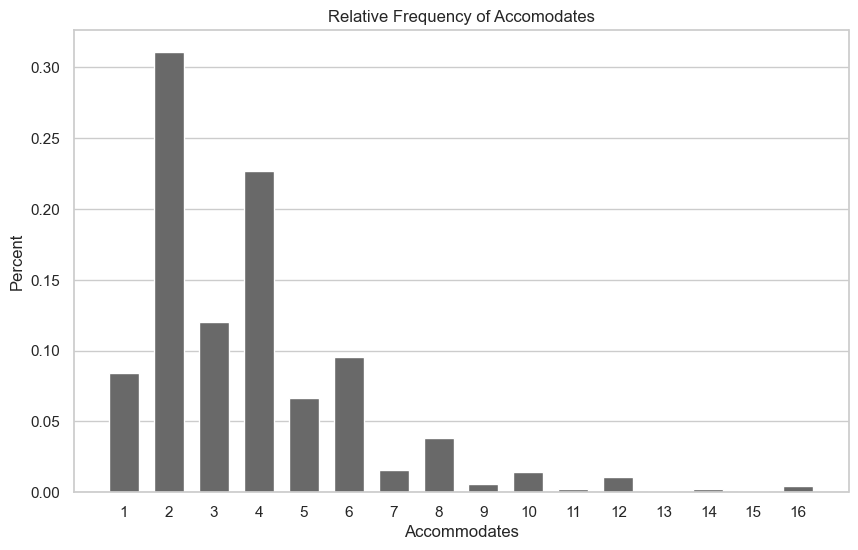

In [14]:
counts = tempDF["accommodates"].value_counts().sort_index()
proportions = tempDF["accommodates"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Accommodates")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Accomodates")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Bathrooms_text

Bathrooms_text corresponds to the number of bathrooms in an Airbnb listing. It is a string type variable which makes it a categorical variable. For our analysis we extracted the number of bathrooms and made it a numerical variable in the bathroom_numbers column via a regular expression. Domain knowledge would lead us to believe that more bathrooms would positively affect the price of a listing. As opposed to being less bathrooms which would lead the price to be less.

In [15]:
tempDF = vwListings
tempDF["bathrooms_text"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['bathrooms_text'], inplace=True)

In [16]:
tempDF['bathroom_numbers'] = tempDF['bathrooms_text'].str.extract('(\d+)')

In [17]:
tempDF["bathroom_numbers"].describe()

count     5548
unique      10
top          1
freq      4205
Name: bathroom_numbers, dtype: object

In [18]:
pd.DataFrame(tempDF["bathroom_numbers"].value_counts())

,bathroom_numbers
1,4205
2,968
3,241
4,64
0,52
5,12
11,2
7,2
6,1
15,1


Overall, most listings have only 1 bathroom while the next most have only 2 bathrooms. The third most listings have 1 shared bath followed by listings with 2.5 baths. There are outlier values such as 11 shared baths, 0 baths, and 15 baths in an Airbnb listing. 

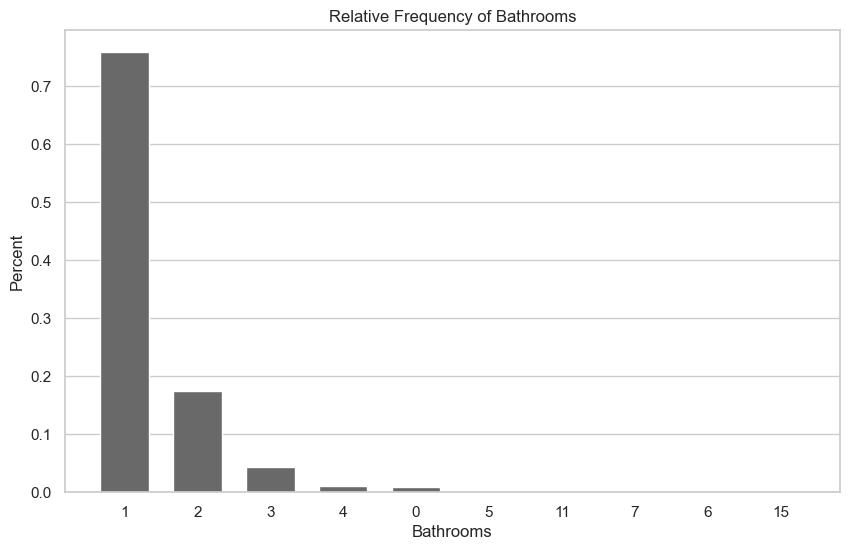

In [19]:
counts = tempDF["bathroom_numbers"].value_counts().sort_index()
proportions = tempDF["bathroom_numbers"].value_counts(normalize=True)
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Bathrooms")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Bathrooms")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Bedrooms

bedrooms is a numerical variable that corresponds to the number of bedrooms in an Airbnb listing. It is a key feature of an Airbnb and based on our domain knowledge would suggest that it significant affects the price of it. With more bedrooms, the price of the Airbnb listing would increase.

In [20]:
tempDF = vwListings
tempDF["bedrooms"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['bedrooms'], inplace=True)

In [21]:
tempDF["bedrooms"].describe()

count    5097.000000
mean        1.639200
std         1.031441
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        15.000000
Name: bedrooms, dtype: float64

When we look at the descriptive statistics of number of bedrooms in an Airbnb listing, the first thing we notice is that the extreme maximum value of 15 bedrooms is much more extreme than most of the distribution of bedrooms. Each Airbnb has at least 1 bedroom but the majority of listings in the Airbnb data contain only 1 to 2 bedrooms, given that the 75% quartile is 2 bedrooms. The mean number of bedrooms is 1.65 and the median is one bedroom. 

In [22]:
tempDF["bedrooms"].value_counts().sort_index()

1.0     3161
2.0     1122
3.0      479
4.0      218
5.0       84
6.0       22
7.0        7
8.0        2
9.0        1
15.0       1
Name: bedrooms, dtype: int64

Taking a look at the value counts, only one listing has 15 bedrooms while 1 listing has 9 bedrooms. A majority of listings have 1 and 2 bedrooms which correspond to the descriptive statistics. Additionally, there are a sizeable number of Airbnb listings with 3-5 bedrooms with 429, 218 and 84 listings respectively with these number of bedrooms. 

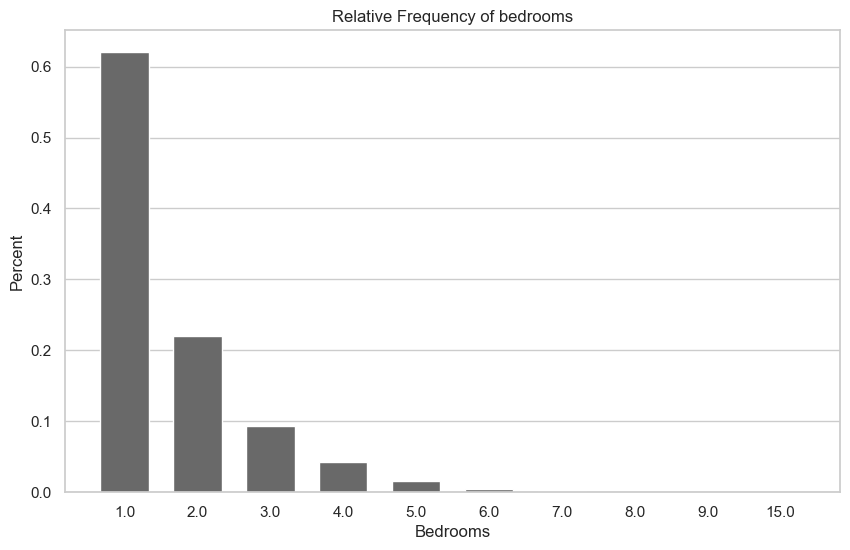

In [23]:
counts = tempDF["bedrooms"].value_counts().sort_index()
proportions = tempDF["bedrooms"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("Bedrooms")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of bedrooms")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Beds

Beds corresponds to the number of beds in an Airbnb listing. This column is not the same as bedrooms due to the fact that a bed or futon could be classified as a bed which means there could be beds not in a bedroom. Additionally there could be more than one bed in a bedroom. Domain knowledge would lead us to believe that more beds would demand higher prices which is the same intuition as bedrooms and accommodates.

In [24]:
tempDF = vwListings
tempDF["beds"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['beds'], inplace=True)

In [25]:
tempDF["beds"].describe()

count    5051.000000
mean        2.114829
std         1.461953
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: beds, dtype: float64

In [26]:
tempDF["beds"].value_counts().sort_index()

1.0     2142
2.0     1560
3.0      708
4.0      306
5.0      138
6.0      113
7.0       31
8.0       30
9.0        8
10.0       6
11.0       1
12.0       7
20.0       1
Name: beds, dtype: int64

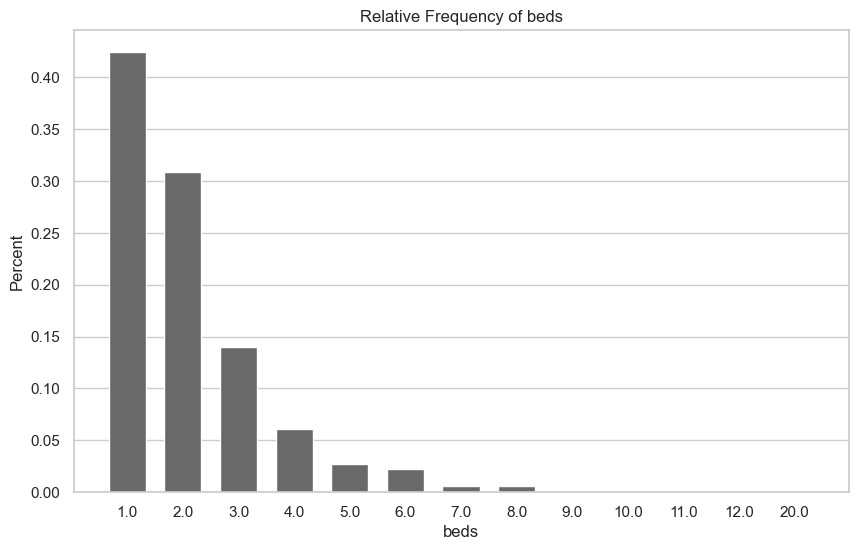

In [27]:
counts = tempDF["beds"].value_counts().sort_index()
proportions = tempDF["beds"].value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.bar(x, proportions, width, color="dimgray", align="center")
axes.set_xlabel("beds")
axes.set_xticks(x)
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of beds")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)

plt.show()
plt.close()

## Amenities

Amenities is a description of the amenities provided by the listing. It is a JSON type variable and provides a list of amenities by the Airbnb. This column is potentially very noise as the list of amenities have no correlation with one another and each duplicate description could be from the same owner of the Airbnb. 

In [28]:
tempDF = vwListings
tempDF["amenities"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['amenities'], inplace=True)

In [29]:
tempDF["amenities"].describe()

count                                                  5051
unique                                                 4510
top       ["Bathtub", "Coffee", "Pool", "Paid parking of...
freq                                                     90
Name: amenities, dtype: object

There are 4510 unique descriptions of amenities so essentially each listing of amenities almost has its own unique amenities description.

In [30]:
pd.DataFrame(tempDF["amenities"].value_counts())

,amenities
"[""Bathtub"", ""Coffee"", ""Pool"", ""Paid parking off premises"", ""Ethernet connection"", ""Air conditioning"", ""Baking sheet"", ""Long term stays allowed"", ""TV"", ""Carbon monoxide alarm"", ""Elevator"", ""Clothing storage"", ""Toaster"", ""Bed linens"", ""Smoke alarm"", ""Crib - available upon request"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""Pets allowed"", ""Shower gel"", ""Cooking basics"", ""Dishwasher"", ""Conditioner"", ""Outdoor furniture"", ""Extra pillows and blankets"", ""Refrigerator"", ""Cleaning products"", ""Hot water"", ""Oven"", ""Blender"", ""Body soap"", ""Hangers"", ""Dishes and silverware"", ""Freezer"", ""Heating"", ""Smart lock"", ""Washer"", ""Coffee maker"", ""Dining table"", ""Essentials"", ""Kitchen"", ""Exercise equipment"", ""Window guards"", ""Wifi"", ""Dryer"", ""Iron"", ""Wine glasses"", ""Self check-in"", ""Stove"", ""Hot water kettle"", ""Gym""]",90
"[""Air conditioning"", ""Paid parking on premises"", ""Carbon monoxide alarm"", ""Bed linens"", ""Smoke alarm"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""Pets allowed"", ""First aid kit"", ""TV with standard cable"", ""Extra pillows and blankets"", ""Dedicated workspace"", ""Hot water"", ""Hangers"", ""Heating"", ""Luggage dropoff allowed"", ""Fire extinguisher"", ""Essentials"", ""Building staff"", ""Wifi"", ""Iron"", ""Self check-in"", ""Gym""]",42
"[""Air conditioning"", ""Private entrance"", ""Carbon monoxide alarm"", ""Bed linens"", ""Smoke alarm"", ""Shampoo"", ""Hair dryer"", ""First aid kit"", ""TV with standard cable"", ""Extra pillows and blankets"", ""Hot water"", ""Hangers"", ""Heating"", ""Washer"", ""Coffee maker"", ""Luggage dropoff allowed"", ""Fire extinguisher"", ""Essentials"", ""Building staff"", ""Wifi"", ""Dryer"", ""Iron"", ""Self check-in"", ""Gym""]",21
"[""Air conditioning"", ""Long term stays allowed"", ""Carbon monoxide alarm"", ""Room-darkening shades"", ""Bed linens"", ""Smoke alarm"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""First aid kit"", ""Cooking basics"", ""Keypad"", ""Refrigerator"", ""Oven"", ""Hangers"", ""Dishes and silverware"", ""Heating"", ""Fire extinguisher"", ""Essentials"", ""Kitchen"", ""Wifi"", ""Breakfast"", ""Iron"", ""Self check-in"", ""Stove""]",19
"[""Bathtub"", ""Air conditioning"", ""Private entrance"", ""Long term stays allowed"", ""TV"", ""Carbon monoxide alarm"", ""Elevator"", ""Dryer \u2013\u00a0In unit"", ""Bed linens"", ""Smoke alarm"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""Pets allowed"", ""Dishwasher"", ""Refrigerator"", ""Hot water"", ""Oven"", ""Hangers"", ""Lockbox"", ""Heating"", ""Coffee maker"", ""Washer \u2013\u00a0In unit"", ""Essentials"", ""Kitchen"", ""Wifi"", ""Iron"", ""Self check-in"", ""Gym""]",17
...,...
"[""Single level home"", ""Air conditioning"", ""Private entrance"", ""TV"", ""Carbon monoxide alarm"", ""Smoke alarm"", ""Free street parking"", ""Microwave"", ""Shampoo"", ""Hair dryer"", ""First aid kit"", ""Cooking basics"", ""Dishwasher"", ""Extra pillows and blankets"", ""Refrigerator"", ""Hot water"", ""Oven"", ""Free parking on premises"", ""Hangers"", ""Dishes and silverware"", ""Heating"", ""Smart lock"", ""Washer"", ""Coffee maker"", ""Backyard"", ""Luggage dropoff allowed"", ""Fire extinguisher"", ""Essentials"", ""Kitchen"", ""Wifi"", ""Dryer"", ""Iron"", ""Self check-in"", ""Stove""]",1
"[""Hangers"", ""Cooking basics"", ""Essentials"", ""Breakfast"", ""Hair dryer"", ""Kitchen"", ""Bed linens"", ""Oven"", ""Washer"", ""Private entrance"", ""Iron"", ""Smart lock"", ""Coffee maker"", ""Lock on bedroom door"", ""Dishes and silverware"", ""Wifi"", ""Outdoor furniture"", ""First aid kit"", ""Dishwasher"", ""Extra pillows and blankets"", ""Smoke alarm"", ""Air conditioning"", ""Refrigerator"", ""Heating"", ""Dryer"", ""Stove"", ""Free street parking"", ""Microwave"", ""Hot water"", ""Long term stays allowed"", ""Shampoo"", ""Fire extinguisher"", ""Carbon monoxide alarm""]",1
"[""Paid parking off premises"", ""Ethernet

As we can see from our EDA, this column has a lot of noise as there are 4510 unique amenties descriptions. The top frequency is 90 where it could potentially be coming from the same Airbnb host copying their amenities description across their Airbnb listings. Overall, this column may be difficult to serve as useful for our model unless we can extract key words from each amenities JSON body. 

## Minimum_minimum_nights

Minimum_minimum_nights is a numerical variable that describes the smallest minimum_night value from the calendar table of the listing. It accounts for all 365 nights in the future. This is the minimum required nights that need to be booked in order to be able to book the listing. 

In [31]:
tempDF = vwListings
tempDF["minimum_minimum_nights"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['minimum_minimum_nights'], inplace=True)

In [32]:
tempDF["minimum_minimum_nights"].describe()

count    5051.000000
mean       21.703623
std        48.325270
min         1.000000
25%         2.000000
50%         3.000000
75%        31.000000
max      1125.000000
Name: minimum_minimum_nights, dtype: float64

Looking at the summary statistics, most of the airbnb listings have a minimum night requirement 1-3 nights. However there are a lot of outliers that make the distribution look skewed to the right because the max value is 1125 nights. 

In [33]:
tempDF["minimum_minimum_nights"].value_counts().sort_index()

1       1155
2       1084
3        391
4         99
5         57
6         11
7         62
8          4
9          1
10        12
12         1
13         3
14        28
15         7
16         1
17         1
20         1
21         7
22         1
25         5
27         1
28        31
29         2
30        71
31      1492
32       216
33         2
35         2
40         2
42         1
45         4
48         1
50         3
55         1
56         1
60        47
65         1
70        10
75         1
77         2
80         1
87         1
89         2
90        40
91        84
110        1
120        5
135        1
150        3
180       20
181        1
183        1
184        4
185        1
200        1
360       48
365       12
600        1
730        1
1125       1
Name: minimum_minimum_nights, dtype: int64

As we see from looking at the value counts of each of the minimum nights, most listings require 1-3 nights in order to book their listing. However, there are a significant amount of listings who need at least 30 nights which means that you would have to book the listing for at least a month in order to stay. These are most likely long term stays for Airbnb.

## Maximum_minimum_nights

Maximum_minimum nights is a numeric variable that describes the largest minimum_night value from the calendar. It accounts for all 365 nights in the future. This is the minimum required nights that need to be booked in order to be able to book the listing.

In [34]:
tempDF = vwListings
tempDF["maximum_minimum_nights"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['maximum_minimum_nights'], inplace=True)

In [35]:
tempDF["maximum_minimum_nights"].describe()

count    5051.000000
mean       38.908929
std        95.998420
min         1.000000
25%         2.000000
50%         5.000000
75%        31.000000
max      1125.000000
Name: maximum_minimum_nights, dtype: float64

Looking at the summary statistics, most of the airbnb listings have a minimum night requirement 1-5 nights. However there are a lot of outliers that make the distribution look skewed to the right because the max value is 1125 nights.

In [36]:
tempDF["maximum_minimum_nights"].value_counts().sort_index()

1        600
2        965
3        610
4        301
5        112
6         25
7         83
8          3
10        20
13         3
14        30
15         7
16         1
17         1
20         4
21         9
22         1
25         2
26         3
27         1
28        41
29         2
30       163
31      1513
32        19
33         2
35         2
40         2
42         1
45         6
48         1
50         3
55         2
56         1
60        28
65         1
70        10
75         1
77         2
80         2
89         2
90        49
91        84
99         1
100        1
110        2
115       20
120       14
135        1
150        5
180       20
181        1
183        1
184        4
185        1
200        1
250        1
360       48
365       18
366      158
600        1
730       34
1125       1
Name: maximum_minimum_nights, dtype: int64

As we see from looking at the value counts of each of the minimum nights, most listings require 1-3 nights in order to book their listing. There are more longer term requirements due to the maximum value that is scraped from the calendar.

## Pairwise Variable EDA

In [37]:
def correlation(data, x, y):
    print("Correlation coefficients:")
    r = stats.pearsonr(data[x], data[y])[0]
    print( "r   =", r, f"({classify_correlation(r)})")
    rho = stats.spearmanr(data[x], data[y])[0]
    print( "rho =", rho, f"({classify_correlation(rho)})")

In [38]:
def classify_correlation(r):
    r = abs(r)
    if r < 0.16:
        return "very weak"
    if r < 0.29:
        return "weak"
    if r < 0.49:
        return "low"
    if r < 0.69:
        return "moderate"
    if r < 0.89:
        return "strong"
    return "very strong"

In [39]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        print(grouped_y.transpose())
    else:
        print(grouped_y)

In [40]:
vwListings['price_number'] = tempDF['price'].str.extract('(\d+)').astype(float)

In [41]:
vwListings['price_number']

1        67.0
2        85.0
3        90.0
4        40.0
5        40.0
        ...  
8604    595.0
8607     69.0
8611    272.0
8612    200.0
8613    176.0
Name: price_number, Length: 5051, dtype: float64

## Neighbourhood_cleansed vs. price

Overall, neighbourhood_cleansed should affect price and there should be noticeable differences in price based on where the listing is located. Factors that help determine this could be things to do around the area, public transportation available, safety and crime, and income levels. 

In [42]:
tempDF = vwListings
tempDF["neighbourhood_cleansed"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['neighbourhood_cleansed'], inplace=True)

In [43]:
describe_by_category(tempDF, "price_number", "neighbourhood_cleansed", transpose=True)

neighbourhood_cleansed  Brightwood Park, Crestwood, Petworth  Brookland, Brentwood, Langdon  Capitol Hill, Lincoln Park  Capitol View, Marshall Heights, Benning Heights  \
count                                             259.000000                      78.000000                  451.000000                                        73.000000   
mean                                              147.135135                     169.910256                  209.756098                                       142.835616   
std                                               118.750182                     111.825953                  160.912835                                       127.259360   
min                                                30.000000                      29.000000                    1.000000                                        34.000000   
25%                                                74.500000                      99.250000                  115.500000                     

Overall, there are noticeable differences in different neighbourhoods and their price. For example, the neighbourhoods with the lowest median price include "Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights", "Congress Heights, Bellevue, Washington Highlands", "Capitol View, Marshall Heights, Benning Heights". Each of these neighbourhoods have a median price listing of 80 to 89. For the neighbourhoods with the highest median price, there is a significant gap in comparison with the lower median prices. For example, "Southwest Employment Area, Southwest/Waterfront, Fort McNair, Buzzard Point" has a median listing price of 215. West End, Foggy Bottom, GWU has a median price listing of 198 which is the neighbourhood around George Washington University which is a significant factor in driving up the price of the listings in the area. The most expensive neighbourhood is Woodland/Fort Stanton, Garfield Heights, Knox Hill with a median listing price of 230. 

## Accommodates vs. price

Accommodates describes the maximum capacity of the Airbnb listing. Overall, it should affect price as it would mean more guests would be staying at the listing. More resources are required to host the guests therefore increasing cost for the owner and needing to increase the price. We expect there to be a moderate to strong correlation between accommodates and price.

In [44]:
tempDF = vwListings
tempDF["accommodates"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['accommodates'], inplace=True)

In [45]:
correlation(tempDF, "price_number", "accommodates")

Correlation coefficients:
r   = 0.4400452070150463 (low)
rho = 0.5592544357465467 (moderate)


Pearson's correlation coefficient 𝑟, outputs as 0.44 which indicates a low positive relationship. For Spearman's coefficient, it is slightly higher at 0.55 which indicates a moderate positive relationship. We can plot the data to get a visualization of this pairwise relationship.

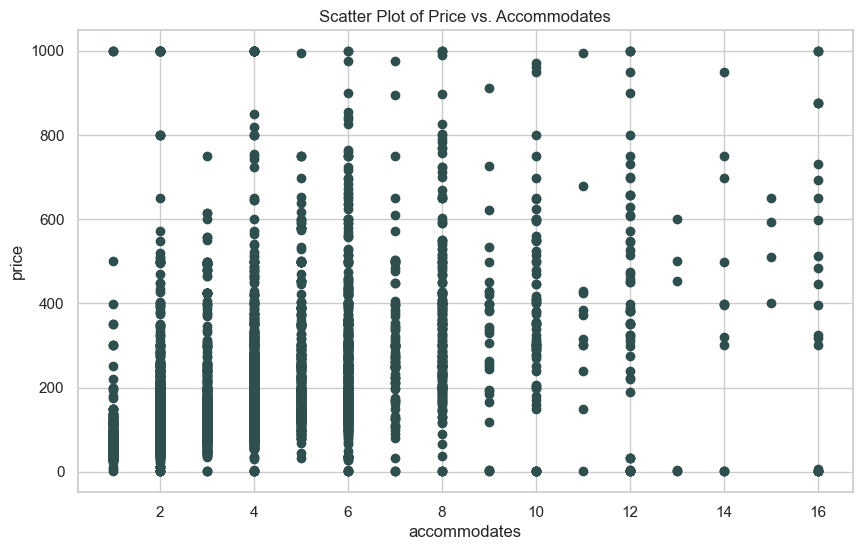

In [46]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( tempDF["accommodates"], tempDF["price_number"], marker="o", color="darkslategray")

axes.set_ylabel("price")
axes.set_xlabel("accommodates")
axes.set_title("Scatter Plot of Price vs. Accommodates")

plt.show()
plt.close()

When looking at the scatter plot visualization, there is a slight pattern as accommodates increases, then price increases. This would be reflective on the correlation coefficients that show a moderate positive relationship between accommodates and price. The scatter plot is indicative of that.

## Bathrooms_text vs. price

Overall, number of bathrooms should affect price as well as it would make a listing more desirable and could accommodate more guests for their stay. We expect there to be a moderate positive relationship between number of bathrooms and price.

In [47]:
tempDF = vwListings
tempDF["bathrooms_text"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['bathrooms_text'], inplace=True)

In [48]:
tempDF['bathroom_numbers'] = tempDF['bathrooms_text'].str.extract('(\d+)').astype(float)

In [49]:
correlation(tempDF, "price_number", "bathroom_numbers")

Correlation coefficients:
r   = 0.3623013038027523 (low)
rho = 0.37360919929280917 (low)


Pearson's correlation coefficient 𝑟, outputs as 0.36 which indicates a low positive relationship. For Spearman's coefficient, it is slightly higher at 0.37 which also indicates a low positive relationship. This is contrary to our belief that there is a moderate positive relationship between the two variables. We can plot the data to get a visualization of this pairwise relationship.

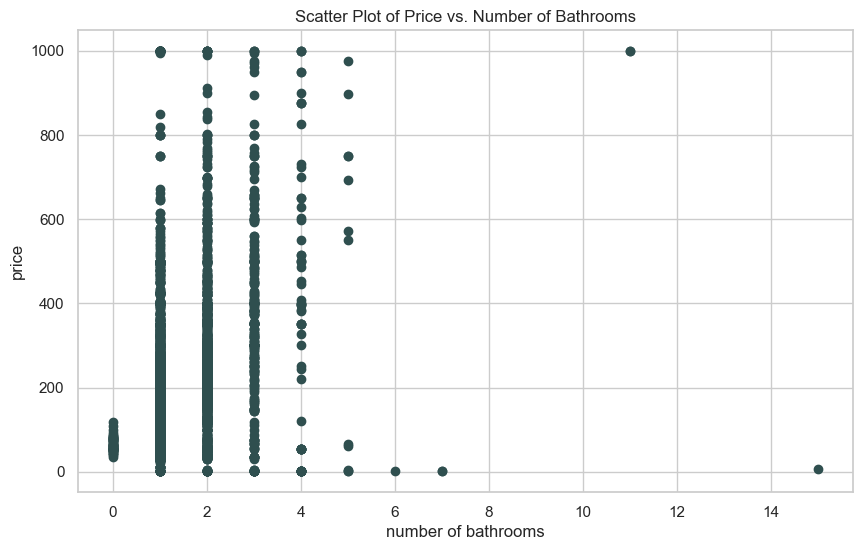

In [50]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( tempDF["bathroom_numbers"], tempDF["price_number"], marker="o", color="darkslategray")

axes.set_ylabel("price")
axes.set_xlabel("number of bathrooms")
axes.set_title("Scatter Plot of Price vs. Number of Bathrooms")

plt.show()
plt.close()

When looking at the scatter plot visualization, there is not really a pattern as number of bathrooms increases. This would be reflective on the correlation coefficients that show a low positive relationship between number of bathrooms and and price. However, there is a strong indication that a listing having no bathrooms will cap the ceiling of the airbnb listing price to under 200. As long as a listing has at least one bathroom then the price should be able to increase.

## Bedrooms vs. price

Overall, number of bedrooms should affect price as well as it would make a listing more desirable and could accommodate more guests for their stay. We expect there to be a moderate positive relationship between number of bathrooms and price.

In [51]:
tempDF = vwListings
tempDF["bedrooms"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['bedrooms'], inplace=True)

In [52]:
correlation(tempDF, "price_number", "bedrooms")

Correlation coefficients:
r   = 0.37300530186648145 (low)
rho = 0.48222218915945264 (low)


Pearson's correlation coefficient 𝑟, outputs as 0.37 which indicates a low positive relationship. For Spearman's coefficient, it is slightly higher at 0.48 which also indicates a low positive relationship. This is contrary to our belief that there is a moderate positive relationship between the two variables. We can plot the data to get a visualization of this pairwise relationship.

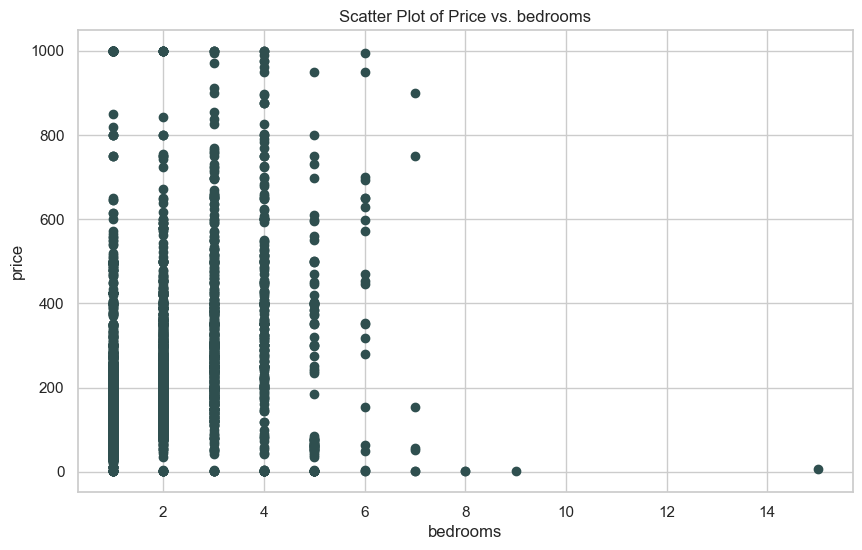

In [53]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( tempDF["bedrooms"], tempDF["price_number"], marker="o", color="darkslategray")

axes.set_ylabel("price")
axes.set_xlabel("bedrooms")
axes.set_title("Scatter Plot of Price vs. bedrooms")

plt.show()
plt.close()

When looking at the scatter plot visualization, there is not really a pattern as number of bathrooms increases. This would be reflective on the correlation coefficients that show a low positive relationship between number of bedrooms and and price.

Overall, number of beds should affect price as well as it would make a listing more desirable and could accommodate more guests for their stay. We expect there to be a moderate positive relationship between number of bathrooms and price.

In [54]:
tempDF = vwListings
tempDF["beds"].replace('', np.nan, inplace=True)
tempDF.dropna(subset=['beds'], inplace=True)

In [55]:
correlation(tempDF, "price_number", "beds")

Correlation coefficients:
r   = 0.36134981435961805 (low)
rho = 0.49005188742929223 (moderate)


Pearson's correlation coefficient 𝑟, outputs as 0.37 which indicates a low positive relationship. For Spearman's coefficient, it is slightly higher at 0.49 which also indicates a moderate positive relationship. We can plot the data to get a visualization of this pairwise relationship.

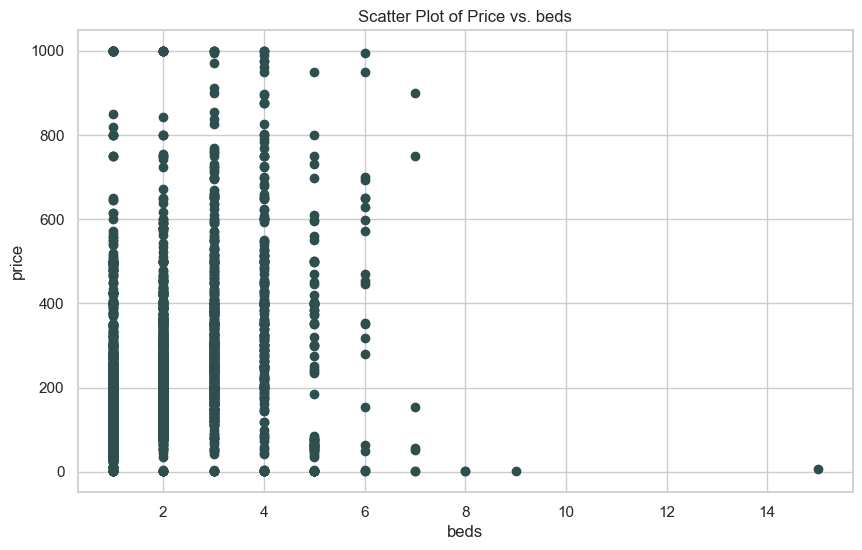

In [56]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter( tempDF["bedrooms"], tempDF["price_number"], marker="o", color="darkslategray")

axes.set_ylabel("price")
axes.set_xlabel("beds")
axes.set_title("Scatter Plot of Price vs. beds")

plt.show()
plt.close()

When looking at the scatter plot visualization, there is not really a pattern as number of bathrooms increases. This would be reflective on the correlation coefficients that show a low positive to moderate relationship between number of beds and and price.